## Fuentes de Error 

El error puede provenir de muchas fuentes al usar un método numérico:
  - Modelo / Error de datos
  - Error de truncamiento
  - Error de punto flotante
 
**Objetivo:** Clasificar y comprender cada tipo de error y explorar algunos enfoques simples para analizar el error.

## Modelos y error de datos

Errores en la formulación fundamental.
  - Lotka-Volterra - conejos fraccionarios, sin extinciones, etc.
  - Error de datos - Inexactitud en la medición o incertidumbres en los parámetros
 
Desafortunadamente, no podemos controlar el modelo y el error de datos directamente, pero podemos usar métodos que pueden ser más sólidos en la presencia de este tipo de errores.

## Error de truncamiento

El clásico ejemplo de error de truncamiento es el calcular $sin(\pi)$, pues como ya vimos en el curso, para su calculo desarrollamos en serie de pontencias a $sin(x)$ alrededor de un punto y luego truncamos esta a algún termino. Este truncamiento induce un error debido a que imposible hacer el calculo de la serie. 

# Aritmética de punto flotante

## Representación de punto fijo

Antes recordemos que cualquier número racional tiene una descomposición decimal, es decir, para $x\in \mathbb{Q}$, tenemos que;

$x = \pm (\alpha_{n}10^{n} + \alpha_{n-1}10^{n-1} \cdots \alpha_{0}10^{0} + \alpha_{-1}10^{-1} + \alpha_{-2}10^{-2} + \dots)$ Con $0\leq \alpha_{n}<10$ para $n\in \mathbb{Z}$

Pero también este mismo racional $x$ tiene una descomposición binaria esto es:

$x = \pm (\alpha_{n}2^{n} + \alpha_{n-1}2^{n-1} \cdots \alpha_{0}2^{0} + \alpha_{-1}2^{-1} + \alpha_{-2}2^{-2} + \dots)$ Con $0\leq \alpha_{n}<2$ para $n\in \mathbb{Z}$

Por ejemplo si queremos represenar al número $\dfrac{11}{2}$ es su representación binaria esta es $\dfrac{11}{2} = 4 + 0  + 1 + \frac{1}{2} =  + 1 \times 2^{2} + 0 \times 2^1 + 1 \times 2^0 + 1 \times 2 ^{-1}= (101.1)_{2}$



Ahora supongamos que una computadora tenemos resevados para cada número sólo 32 lugares, por lo que una forma de almacenar números podría ser la siguiente; cada número de computadora se puede dividir en 3 campos. El primer lugar lo
ocupa el signo y los 31 bits restantes se dividen en dos campos de 15 y 16 bits respectivamente.
<font color=blue>0</font> <font color=green>000000000000000</font> <font color=red>0000000000000000</font>

Es decir;
* <font color=blue> El Primero campo es asignado al sigino, 0 para más y 1 para menos </font>
* <font color=gren> El Segudo campo de 15 bits esta asignado para la parte entera del número </font>
* <font color=red>Los últimos 16 bits se asignan para la parte fraccionaria </font>

Como ejemplo veamos a el número $\dfrac{11}{2}$. Por lo que dicha representación es:

<font color=blue>0</font> <font color=green>000000000000101</font> <font color=red>1000000000000000</font>

Otro ejemplo interesante es $\dfrac{1}{10} = (0.1)_{10}= (0.000110011001100 \dots)_{2}$ y representación de punto fijo es:

<font color=blue> 0 </font> <font color=green>000000000000000</font> <font color=red>0001100110011001</font>

Otra manera más eficiente para es flotar el punto hasta el primer elemento no cero y asignar un cantidad de lugares para el exponente, digamos ocho. Por lo que la representación de sería:

<font color=blue> 0 </font><font color=green>00000000</font> <font color=red>00000000000000000</font>


* <font color=gren> El Segudo campo de 8 bits esta asignado para el exponente </font>
* <font color=red>Los últimos 24 bits se asignan para la parte fraccionaria </font>

Para el caso de un sistema binario $b_0= 1$ podemos normalizar el significado de $S=(b_0.b_1b_2\dots b_{23})_2$ a $S=(1.b_1b_2\dots b_{23})_2$, puesto que $b_0$ siempre es uno podemos omitir este del significado y ocupar un espacio más en el significado, esto es $S=(b_1b_2\dots b_{24})_2$, a $S$ de está manera se le conoce como *mantisa* y a $b_0$ como al *bit escondido*. Además observemos que, puesto que se tienen ocho espacios para el exponente, podemomos generear exponentes entre $-128$ y $127$, pues el exponente más grande en binario que se puede representar con 8 lugares incluyendo el signo es $127$.

* De nueva cuenta regresemos al ejemplo $\dfrac{11}{2}=(1.011)_{2} \times 2 ^{2}$, y en la reprentación de punto flotante normalizada tenemos:

 <font color=blue>0</font> <font color=green>00000010</font> <font color=red>011100000000000000000000</font>
* El número $71 = (1000111)_2= (1.000111)_ \times 2 ^6 $ y su representación de punto flotante normalizada es:

 <font color=blue>0</font> <font color=green>00000110</font> <font color=red>000111000000000000000000</font>
 
* El número $1024 =(10000000000)_2 = (1.0)_2 \times 2 ^{10}$ 
<font color=blue>0</font> <font color=green>00001010</font> <font color=red>000000000000000000000000</font>

Si $x$ es un número que no tiene una expansión binaria finita, debemos terminar su expansión en algún lado. Por ejemplo considerar el número $1/10 = (0.0001100110011...)_2$, si lo truncamos a 23 bits después del punto binario obtenemos $(0.00011001100110011001100)_2$. Sin embargo, si luego lo normailizamos obtenemos $(1.1001100110011001100)_2 \times 2^{-4}$. De fomra que haya un $1$ antes del punto binario, encontramos que ahora tenemos 19 bits correctos después del punto binario. Esto nos lleva a la representación necariamente.

<font color=blue>0</font> <font color=green>1000100</font> <font color=red>10011001100110011000000</font>

Claramente esta no es una buena idea. Es preferible primero normalizar y luego truncar de forma que conservemos los 23  bits correctos después del punto binario

<font color=blue>0</font> <font color=green>1000100</font> <font color=red>10011001100110011001100</font>

de esta forma se utilizan todos los bits disponibles.

## Presición, epsilón de la máquina

La precisión del sistema de punto flotante es el  número de bits del significado (inclusive el bit escondido). Denotamos la precisión por $p$. En el sistema que acabamos de describir $p=24$ (23 bits alamacenados para la parte fraccionaria más el bit escondido a la cabeza). Cualquier número de punto flotante normalizado con precisón $p$ puede expresarse como $$x=\pm(1.b_1b_2...b_{p-2}b_{p-1})\times 2^E$$



Formalmente, un sistema de punto flotante se caracteriza por cuatro números enteros:

* $\beta$ la base
* $p$ presición
* $[L,U]$ el mínimo y máximo de los exponentes

Por definición un número $x$ en el sistema de punto flotante es representado como:

\begin{equation}
x = \pm\left( d_0 + \frac{d_1}{\beta} + + \frac{d_2}{\beta ^2} + \cdots + \frac{d_{p-1}}{\beta ^{p-1}} \right) \beta^{e}
\end{equation}
donde $d_0\neq 0$, $0\leq d_i \leq \beta -1$ e $i= 0,\dots , p-1$

$L \leq e \leq U$

Un sistema numérico de punto flotante es finito y discreto. La cantidad de números de punto flotante normalizados es: $$ 2(\beta -1)\beta^{p-1}(U-L+1) + 1$$

Obsevemos los siguiente:

* El número 2 de la expresión anterior corresponde al signo más y menos, por sin ese lugar todos lo números serían positivos
* El término $\beta - 1$ corresponde a la normalización de $d_0$, ya que este puede tomar valores de $0$ a $\beta -1$
* $\beta^{p-1}$ son los dígitos después del punto que toman valores de $0$ a $\beta -1$
* El término $(U-L+1)$ corresponde de la base al exponente
* Por último el $+1$ es el cero

Existe un número más pequeño que se puede representar con el esquema de normalización de punto flotate y este se conoce como:

Underflow level = UFL = $\beta^L$, es decir, $x = \left( d_0 + \frac{d_1}{\beta} +  \frac{d_2}{\beta ^2} + \cdots + \frac{d_{p-1}}{\beta ^{p-1}} \right) \beta^{e}$, tomamos $d_i = 0, \forall i = 1,\dots,p-1$, entonces

$x_{mím} = \left( d_0  \right) \beta^{e}$, pero $d_0=1$ y el exponente más pequeño es $e =L$, por lo que se tiene:

$x = \beta^{L}$

Y el número más grande en la representación de punto flotante es:

Overflow level = OFL = $\beta^{U+1}(1-\beta^{-p})$

$x_{máx} = \left( \beta -1 + \frac{\beta -1}{\beta} +  \frac{\beta -1}{\beta ^2} + \cdots + \frac{\beta -1}{\beta ^{p-1}} \right) \beta^{U} = (\beta -1)\left( 1 + \frac{1}{\beta} +  \frac{1}{\beta ^2} + \cdots + \frac{1}{\beta ^{p-1}} \right) \beta^{U} = (\beta -1) \displaystyle \sum _{i=0} ^{p-1} \frac{1}{\beta^{i}} \beta^{U}= (\beta -1) \left(\dfrac{1-\frac{1}{\beta^p}}{1- \frac{1}{\beta}}\right) \beta^{U} = (\beta -1) \left(\dfrac{\frac{1-\beta ^{-p}}{1}}{\frac{\beta -1}{\beta}}\right) \beta^{U} = (1-\beta^{-p})\beta^{U+1} $



Los números de punto flotante no se distribuyen uniformemente a lo largo de su dominio, sino que están equiespaciados solo entre las potencias sucesivas de $\beta$. No todos los números reales son exactamente representables en un sistema de punto flotante. Los números reales que son exactamente representables en un sistema de punto flotante dado a veces se llaman números de máquina.

Por último **el épsilon de la máquina** es el número decimal más pequeño que, sumado a 1, la computadora nos arroja un valor diferente de 1, es decir, que no es redondeado. La existencia del épsilon de la máquina es una consecuencia de la precisión finita de la aritmética en coma flotante.

##### Ejemplo :  Sistema de Juguete

Considere un sistema decimal con una presición de dos dígitos (normalizado)
$$f = \pm d_1 . d_2 \times 10^E$$
con $E \in [-2, 0]$.

**Números and distribución de números**
1. ¿Cuántos números podemos representar con este sistema?
2. ¿Cuál es la distribución en la línea real?
3. ¿Cuál es el límite de desbordamiento?

 ¿Cuántos números podemos representar con este sistema?

$$
    f = \pm d_1 . d_2 \times 10^E ~~~ \text{con} E \in [-2, 0]
$$

$$ 
    2 \times 9 \times 10 \times 3 + 1 = 541    
$$

¿Cuál es la distribución en la línea real?

El número más pequeño que podemos representar es $1.0 \times 10^{-2} = 0.01$. Y el más grande es $9.9 \times 10^{0} = 9.9$

In [8]:
%matplotlib inline
from numpy import *
import matplotlib.pyplot as plt

In [9]:
d0_vales = [1,2,3,4,5,6,7,8,9]
dl_vales = [0,1,2,3,4,5,6,7,8,9]
base = 10
E_vales = [-2,-1,0]

floatnumbers = [0]

for E in E_vales:
    for d0 in d0_vales:
        for dl in dl_vales:
            floatnumbers.append((d0 + dl/base)*base**E)
            floatnumbers.append(-1.0*((d0 + dl/base)*base**E))

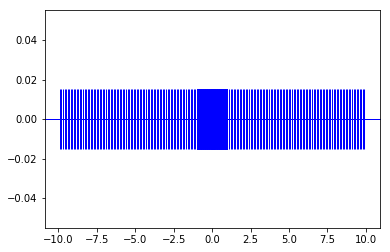

In [14]:
plt.plot(floatnumbers, zeros(len(floatnumbers)), "b+", markersize = 60)

### Ejercicio 2

**Repetir lo mismo pero para un sistema binario con una precisión de $2$. Esto es:**

$$
    f=\pm d_1 . d_2 \times 2^E \quad \text{con} \quad E \in [-1, 1]
$$

*Cuantos numeros puede representar con el sistema?
2x2x(3)+1=13



In [3]:
d0_vales = [1]
dl_vales = [0,1]
base = 2
E_vales = [-1,0,1]

floatnum = [0]

for E in E_vales:
    for d0 in d0_vales:
        for dl in dl_vales:
            floatnum.append((d0 + dl/base)*base**E)
            floatnum.append(-1.0*((d0 + dl/base)*base**E))
            
len(floatnum)            

13

In [4]:
cual es la distribucion en la linea recta?
el numero mas pequeño que podemos representar es 1x10**-1= 0.01
y el numero mas grande lo podemos representar como 2.99

SyntaxError: invalid syntax (<ipython-input-4-6b399c49e408>, line 2)

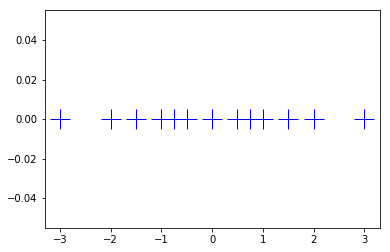

In [15]:
plt.plot(floatnum, zeros(len(floatnum)), "b+", markersize = 20)

### Ejercicio 3

**Realice lo mismo  el siguiente sistema de punto flotante (2,3,-1,1)**

Esto es: $\beta =2$, $p=3$,$L=-1$, $U=1$ 

* Calculemos primero $UFL$
* Ahora calculemos $OFL $
* La cantidad de elementos de punto flotante. 

*cantidad de elementos que puede tener el sistema
2x1x(4)x3+1= 25

*Calculando UFL
2**-1= 1/2

*Calculando OFL
4(1-1/8)= 3.5

In [20]:
d0_vales = [1]
dl_vales = [0,1]
d2_vales = [0,1]
base = 2
E_vales = [-1,0,1]

floatn = [0]

for E in E_vales:
    for d0 in d0_vales:
        for dl in dl_vales:
            for d2 in d2_vales:
                floatn.append((d0 + (dl/base) + (d2/(base**2)))*base**E)
                floatn.append(-1.0*((d0 + (dl/base)+ (d2/base**2))*base**E))
len(floatn)                          

25

### Ejercicio 4

Realicé una función que se llame ```elemetsFloat(base, 3, L, U)```

y genere un sistema de punto flotante, para una base y exponentes dados. Pero presición $3$ Además esta función debe de regresar la cantidad de elementos del sistema así como los $UFL$ y $OFL$

## Ejercicio 5

¿Cómo podría extender la función ```elemetsFloat(base, presicion, L, U)``` para que la presición sea arbitraria?

### Representación sesgada o por exceso del exponente

* La cadena de bits que se almacena para el exponente es la representación binaria de $E$ $+127$. El número $127$ que se añade al exponente deseado $E$ se llama el sesgo expeonencial o también el exceso
* El número $1=(1.00000...0)_2 \times 2^0$ se almacena como 
<font color=blue> $0$ </font> <font color=green> $01111111$ </font> <font color=red> $00000000000000000000000$</font>

* La cadena de bits del exponente es la representación binaria de $0+127$

# Representación IEEE en punto flotante

El estándar IEEE tiene tres requerimientos muy importantes:

* Representación consistente de números de punto flotante para todas las máquinas que adopten el estándar
* Operaciones correctamente redondeadas de punto flotante, usando varios modos de redondeo
* Tratamiento consistente de situaciones excepcionales tales como división por cero

### Presición Sencilla 32 bits

- El almacenamiento total asignado es de 32 bits.
- El exponente es 8 bits $ \Rightarrow E \in [-126, 127] $
- Fracción 23 bits ($ p = 24 $)

```
s EEEEEEEE FFFFFFFFFFFFFFFFFFFFFFF
0 1      8 9                     31
```
Overflow $= 2^{127} \approx 3.4 \times 10^{38}$

Underflow $= 2^{-126} \approx 1.2 \times 10^{-38}$

$\epsilon_{\text{machine}} = 2^{-23} \approx 1.2 \times 10^{-7}$

### Presición doble 64 bits 

- El almacenamiento total asignado es de 64 bits.
- El exponente es 11 bits $ \Rightarrow E \in [-1022, 1024] $
- Fracción 52 bits ($ p = 53 $)

```
s EEEEEEEEEE FFFFFFFFFF FFFFFFFFFF FFFFFFFFFF FFFFFFFFFF FFFFFFFFFF FF
0 1       11 12                                                      63
```
Overflow $= 2^{1024} \approx 1.8 \times 10^{308}$

Underflow $= 2^{-1022} \approx 2.2 \times 10^{-308}$

$\epsilon_{\text{machine}} = 2^{-52} \approx 2.2 \times 10^{-16}$

Recordemos que la presentación de los siguientes númerso

* $\dfrac{11}{2}=(1.0111)_{2} \times 2 ^{3}$, y en la reprentación de punto flotante IEEE tenemos:

 <font color=blue>$0$</font> <font color=green>$10000011$</font> <font color=red>$011100000000000000000000$</font>

* $\dfrac{1}{10}=(1.100110011 \dots)_{2} \times 2 ^{-4}$, y en esta reprentación tenemos:

 <font color=blue>$0$</font> <font color=green>$01111011$</font> <font color=red>$10011001100110011001100$</font>
 
El tamaño de variación de las cadenas de bits para el campo del exponente en números normalizados es 00000001 a 11111110 (correspondientes a los decimales de 1 a 254), representando exponente efectivos que van de $E_{mín}=-126$ a $E_{máx}=127$. 
El número positivo normalizado más pequeño que puede almacenarse esta representado por: <font color=blue>$0$</font> <font color=green>$00000001$</font> <font color=red>$00000000000000000000000$</font>

Este último número se representa por $N_{mín}= (1.000...0)_2\times 2 ^{-126} = 2^{-126}≈1.2\times 10^{-38}$

In [45]:
2.0^-126

1.1754943508222875e-38

In [50]:
1.2e-38

1.2e-38

El mayor número normalizado se representa como <font color=blue>$0$</font> <font color=green>$11111110$</font> <font color=red>$11111111111111111111111$</font> se denota como $N_{máx}=(1.11111...1)_2\times2^{127}≈3.4\times10^{38}$

In [52]:
2.0^127

1.7014118346046923e38

### Acceso de Python a los números IEEE

Acceda a muchos parámetros importantes, como la máquina épsilon:

```python
import numpy
numpy.finfo(float).eps
```

In [4]:
print(numpy.finfo(numpy.float16))
print(numpy.finfo(numpy.float32))
print(numpy.finfo(float))
print(numpy.finfo(numpy.float128))

Machine parameters for float16
---------------------------------------------------------------
precision =   3   resolution = 1.00040e-03
machep =    -10   eps =        9.76562e-04
negep =     -11   epsneg =     4.88281e-04
minexp =    -14   tiny =       6.10352e-05
maxexp =     16   max =        6.55040e+04
nexp =        5   min =        -max
---------------------------------------------------------------

Machine parameters for float32
---------------------------------------------------------------
precision =   6   resolution = 1.0000000e-06
machep =    -23   eps =        1.1920929e-07
negep =     -24   epsneg =     5.9604645e-08
minexp =   -126   tiny =       1.1754944e-38
maxexp =    128   max =        3.4028235e+38
nexp =        8   min =        -max
---------------------------------------------------------------

Machine parameters for float64
---------------------------------------------------------------
precision =  15   resolution = 1.0000000000000001e-15
machep =    -52   e

In [11]:
eps = numpy.finfo(float).eps

In [12]:
eps

2.220446049250313e-16

In [21]:
1 + (99*eps)/102

1.0000000000000002